<a href="https://colab.research.google.com/github/zeerau/deeptech_ready/blob/main/Text_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

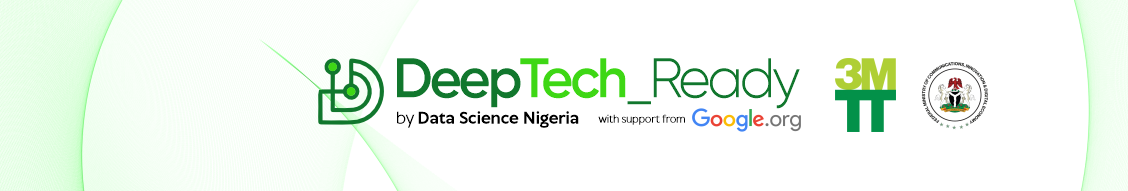

![image.png](attachment:6fc7b9da-208e-4fa3-b15d-24a57f8dddf7.png)

# 1. One-Hot Encoding
### Objective:
Convert categorical words into binary vectors, where each word is uniquely represented.

### Steps:
1. Define `vocabulary = ["cat", "dog", "fish"]`.
2. Convert the vocabulary to a column matrix using `reshape(-1, 1)`.
3. Use `OneHotEncoder(sparse=False)` to encode words.
4. `fit_transform(data)` generates binary vectors for each word.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example Vocabulary
vocabulary = ["cat", "dog", "fish"]

# Converting words to numerical indices
data = np.array(vocabulary).reshape(-1, 1)

# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
one_hot = encoder.fit_transform(data)

print("Vocabulary:", vocabulary)
print("One-Hot Encoded Vectors:\n", one_hot)


Vocabulary: ['cat', 'dog', 'fish']
One-Hot Encoded Vectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 2. Bag of Words
### Objective:
Convert text documents into numerical vectors by counting word occurrences in each document.

### Steps:
1. Define example sentences: `documents = ["The dog barks", "The cat meows"]`.
2. Initialize `CountVectorizer()` to create the BoW model.
3. Use `fit_transform(documents)` to:
   - Build the vocabulary (`["barks", "cat", "dog", "meows", "the"]`).
   - Generate word count vectors for each document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Example Sentences
documents = ["The dog barks", "The cat meows"]

# Create BoW Model
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(documents)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Representation:\n", bow.toarray())


Vocabulary: ['barks' 'cat' 'dog' 'meows' 'the']
Bag of Words Representation:
 [[1 0 1 0 1]
 [0 1 0 1 1]]


# 3. TF-IDF
### Objective:
Represent text as numerical vectors by weighting words based on their frequency and importance across documents.

### Steps:
1. Define example sentences: `documents = ["The dog barks", "The cat meows"]`.
2. Initialize `TfidfVectorizer()` to create the TF-IDF model.
3. Use `fit_transform(documents)` to:
   - Build the vocabulary (`["barks", "cat", "dog", "meows", "the"]`).
   - Compute TF-IDF scores for each word in each document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example Sentences
documents = ["The dog barks", "The cat meows"]

# Create TF-IDF Model
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(documents)

print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Representation:\n", tfidf.toarray())


Vocabulary: ['barks' 'cat' 'dog' 'meows' 'the']
TF-IDF Representation:
 [[0.6316672  0.         0.6316672  0.         0.44943642]
 [0.         0.6316672  0.         0.6316672  0.44943642]]


# 4. Word2Vec
### Objective:
Generate dense, contextual word embeddings that capture semantic relationships between words.

### Steps:
1. Define example sentences: `sentences = [["the", "dog", "barks"], ["the", "cat", "meows"]]`.
2. Train the Word2Vec model:
   - `vector_size=10`: Embedding dimension is 10.
   - `window=2`: Context window size is 2 words.
   - `min_count=1`: Include words that appear at least once.
   - `workers=4`: Number of CPU threads for training.
3. Retrieve the embedding for a word using `word2vec_model.wv['word']`.

In [ ]:
from gensim.models import Word2Vec

# Example Sentences
sentences = [["the", "dog", "barks"], ["the", "cat", "meows"]]

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, workers=4)

# Get Embedding for a Word
print("Word Embedding for 'dog':\n", word2vec_model.wv['dog'])


Word Embedding for 'dog':
 [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]


# 5. GloVe (Using Pretrained Embeddings)
### Objective:
Use pretrained embeddings to capture semantic relationships between words based on global co-occurrence statistics.

### Steps:
1. Load the pretrained GloVe model (`glove-wiki-gigaword-50`) with 50-dimensional word embeddings.
2. Retrieve the embedding for a specific word using `glove_model['word']`.
3. Find semantically similar words using `glove_model.most_similar('word')`.

In [ ]:
import gensim.downloader as api

# Load Pretrained GloVe Model
glove_model = api.load("glove-wiki-gigaword-50")  # 50-dimensional embeddings

# Get Embedding for a Word
print("Word Embedding for 'dog':\n", glove_model['dog'])

# Find Similar Words
print("Words similar to 'dog':\n", glove_model.most_similar('dog'))


Word Embedding for 'dog':
 [ 0.11008   -0.38781   -0.57615   -0.27714    0.70521    0.53994
 -1.0786    -0.40146    1.1504    -0.5678     0.0038977  0.52878
  0.64561    0.47262    0.48549   -0.18407    0.1801     0.91397
 -1.1979    -0.5778    -0.37985    0.33606    0.772      0.75555
  0.45506   -1.7671    -1.0503     0.42566    0.41893   -0.68327
  1.5673     0.27685   -0.61708    0.64638   -0.076996   0.37118
  0.1308    -0.45137    0.25398   -0.74392   -0.086199   0.24068
 -0.64819    0.83549    1.2502    -0.51379    0.04224   -0.88118
  0.7158     0.38519  ]
Words similar to 'dog':
 [('cat', 0.9218004941940308), ('dogs', 0.8513158559799194), ('horse', 0.7907583713531494), ('puppy', 0.7754921913146973), ('pet', 0.7724708318710327), ('rabbit', 0.7720814347267151), ('pig', 0.7490062713623047), ('snake', 0.7399188876152039), ('baby', 0.7395570278167725), ('bite', 0.7387937307357788)]


### Relevance of GloVe Embeddings
GloVe embeddings provide a rich semantic representation of words, enabling their use as input features for NLP tasks like text classification, semantic similarity, and transfer learning. Pretrained embeddings save computation time and improve performance on tasks with limited data.

# 6. FastText (Using Pretrained Embeddings)
### Objective:
Generate word embeddings that incorporate subword information, making it robust for rare or unseen words.

### Steps:
1. Load the pretrained FastText model (`fasttext-wiki-news-subwords-300`) with 300-dimensional embeddings.
2. Retrieve the embedding for a word using `fasttext_model['word']`.
3. Find semantically similar words using `fasttext_model.most_similar('word')`.

In [ ]:
import gensim.downloader as api
print("Gensim Default Data Directory:", api.BASE_DIR)


Gensim Default Data Directory: C:\Users\LATITUDE 7290/gensim-data


In [ ]:
import gensim.downloader as api

# Load Pretrained FastText Model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # 300-dimensional embeddings

# Get Embedding for a Word
print("Word Embedding for 'unbelievable':\n", fasttext_model['unbelievable'])

# Find Similar Words
print("Words similar to 'unbelievable':\n", fasttext_model.most_similar('unbelievable'))


Word Embedding for 'unbelievable':
 [-0.024071    0.0382      0.0063141   0.0091382  -0.044908   -0.029659
 -0.011629   -0.069979    0.0016355   0.026078   -0.022859   -0.022523
  0.036808   -0.01262     0.012728   -0.027969    0.0235     -0.0068912
  0.014152   -0.0084359   0.018351    0.010021   -0.064723    0.05836
 -0.0218     -0.032372    0.051574   -0.0017676   0.10943     0.0078742
 -0.029371    0.024345    0.01238    -0.076805    0.029242    0.0043572
  0.024063   -0.0053744  -0.012299   -0.025262   -0.026567   -0.011753
  0.026662   -0.020669    0.022949   -0.0028342  -0.0041274  -0.0038758
  0.0059928   0.016769    0.013107   -0.0047901   0.027534    0.0015534
  0.013678    0.035934   -0.02073    -0.02666    -0.087774    0.0074407
 -0.015593    0.0077406   0.018244   -0.035258    0.047193   -0.013407
  0.018526    0.000801   -0.0061396  -0.0020827   0.022667   -0.020937
  0.023686    0.0374     -0.013786    0.019769   -0.0052718  -0.031853
 -0.01668     0.012516   -0.04789   

# 7. BERT (Using Hugging Face Transformers)
### Objective:
Generate contextualized embeddings for tokens, capturing both their semantic meaning and context within a sentence.

### Steps:
1. Load the BERT tokenizer and model (`bert-base-uncased`).
2. Tokenize the input sentence and encode it into tensors (`return_tensors="tf"`).
3. Pass the encoded input through the BERT model to obtain `last_hidden_states`:
   - **Shape**: `(batch_size, sequence_length, hidden_size)`.
   - Each token is represented by a 768-dimensional vector.

In [ ]:
from transformers import BertTokenizer, TFBertModel

# Load BERT Tokenizer and Model (TensorFlow-only weights)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Input Sentence
sentence = "The bank is near the river."

# Tokenize and Encode the Input
inputs = tokenizer(sentence, return_tensors="tf")  # Use TensorFlow tensors

# Get BERT Embeddings
outputs = model(inputs)
last_hidden_states = outputs.last_hidden_state  # Shape: (batch_size, sequence_length, hidden_size)

print("BERT Embeddings Shape:", last_hidden_states.shape)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

BERT Embeddings Shape: (1, 9, 768)


## Printing the Embedding for a Specific Token
For example, let's print the embedding for the word `"bank".`

In [ ]:
# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# Index of the token 'bank'
bank_index = tokens.index("bank")

# Extract and print the embedding for 'bank'
bank_embedding = last_hidden_states[0, bank_index, :].numpy()
print("Embedding for 'bank':\n", bank_embedding)


Tokens: ['the', 'bank', 'is', 'near', 'the', 'river', '.']
Embedding for 'bank':
 [-9.09297228e-01 -5.50447941e-01 -4.92177486e-01 -3.57548058e-01
  5.70740163e-01 -1.35528920e-02 -4.23514396e-01  6.93685234e-01
  1.02599792e-01 -6.18486881e-01  1.35196358e-01 -4.14060891e-01
 -2.85484076e-01 -3.21815014e-02 -1.24647450e+00  2.86207139e-01
  6.79582059e-01 -2.41557345e-01  6.54102802e-01 -2.17493132e-01
 -4.63050544e-01  5.52333258e-02 -5.62391460e-01  3.60001028e-01
  9.29306746e-02  3.02497268e-01  3.06889303e-02  8.17640185e-01
  3.80383357e-02  2.06168965e-01  2.36864582e-01  1.69585884e-01
 -5.43856263e-01  2.81694122e-02 -1.52134836e-01 -1.77204043e-01
 -1.30822331e-01  2.00116545e-01 -2.30009854e-01 -1.06135104e-02
  9.06973928e-02 -1.24280095e-01  1.10550217e-01 -2.11748913e-01
  2.42812976e-01 -6.60906315e-01  1.95541620e-01  3.74683179e-02
 -4.64821130e-01 -2.84247845e-01 -2.10939825e-01 -4.86841798e-03
 -7.18596041e-01  3.77014935e-01  2.21557423e-01  8.06053340e-01
  1.1871

![image.png](attachment:965d4370-3027-464b-aafe-40cdd6955bfd.png)